In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# O desafio

O recozimento é um tratamento térmico que tem por finalidade eliminar a dureza de
uma peça temperada ou normalizar materiais com tensões internas resultantes do
forjamento, da laminação e da trefilação. De acordo com o novo nível de dureza do
material tratado, o resultado do processo de recozimento pode ser classificado como:
ideal, mediano ou ruim.
O conjunto de dados apresentado traz o resultado da execução de diferentes processos
de recozimento em experimentos variados.
Assim sendo, o candidato deve utilizar os dados para treinar um modelo de machine
learning que posteriormente deverá ser utilizado para predizer o resultado de novos
processos de recozimento.

# Importação e Merge dos Datasets

In [3]:
# Importação dos Dados 

arquivo_01 = 'train.csv'
arquivo_02 = 'data_experimentos.csv'

df_arquivo_01 = pd.read_csv(arquivo_01)
df_arquivo_02 = pd.read_csv(arquivo_02)

In [4]:
df_arquivo_01.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
0,?,C,A,8,0,?,S,?,0,?,...,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2
1,?,C,R,0,0,?,S,2.0,0,?,...,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368
2,?,C,A,0,60,T,?,?,0,?,...,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130
3,?,C,A,0,60,T,?,?,0,?,...,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402
4,?,C,A,0,45,?,S,?,0,?,...,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407


In [5]:
df_arquivo_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 40 columns):
family                    2424 non-null object
product-type              2424 non-null object
steel                     2424 non-null object
carbon                    2424 non-null int64
hardness                  2424 non-null int64
temper_rolling            2424 non-null object
condition                 2424 non-null object
formability               2424 non-null object
strength                  2424 non-null int64
non-ageing                2424 non-null object
surface-finish            2424 non-null object
surface-quality           2424 non-null object
enamelability             2424 non-null object
bc                        2424 non-null object
bf                        2424 non-null object
bt                        2424 non-null object
bw/me                     2424 non-null object
bl                        2424 non-null object
m                         2424 non-null object
chr

In [6]:
df_arquivo_01['experimento'].head()

0       exp_2
1    exp_1368
2    exp_1130
3     exp_402
4     exp_407
Name: experimento, dtype: object

In [7]:
df_arquivo_02.head()

,exp_id,ano,mes
0,2,2020,8
1,1368,2020,8
2,1130,2020,8
3,402,2020,8
4,407,2020,8


In [8]:
df_arquivo_02['exp_id'] = 'exp_' + df_arquivo_02['exp_id'].astype(str)

In [9]:
df_arquivo_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 3 columns):
exp_id    2424 non-null object
ano       2424 non-null int64
mes       2424 non-null int64
dtypes: int64(2), object(1)
memory usage: 56.9+ KB



Para unir os datasets será necessário formatar a coluna "df_arquivo01['experimento']" para ficar no mesmo formato que a coluna "df_arquivo02['exp_id']"



In [10]:
df_analise = pd.merge(left = df_arquivo_01,
                      right = df_arquivo_02,
                      how = 'outer',
                      left_on='experimento',
                      right_on='exp_id')

In [11]:
df_analise.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,width,len,oil,bore,packing,recozimento,experimento,exp_id,ano,mes
0,?,C,A,8,0,?,S,?,0,?,...,_610.0_,_0_,?,0,?,ruim,exp_2,exp_2,2020,8
1,?,C,R,0,0,?,S,2.0,0,?,...,_1300.0_,_762_,?,0,?,ruim,exp_1368,exp_1368,2020,8
2,?,C,A,0,60,T,?,?,0,?,...,_385.1_,_0_,?,0,?,ideal,exp_1130,exp_1130,2020,8
3,?,C,A,0,60,T,?,?,0,?,...,_255.0_,_269_,?,0,?,ideal,exp_402,exp_402,2020,8
4,?,C,A,0,45,?,S,?,0,?,...,_610.0_,_0_,?,0,?,mediano,exp_407,exp_407,2020,8


In [12]:
df_analise = df_analise.drop(['experimento'], axis = 1)

In [13]:
df_analise.groupby('ano').size()

ano
2019     808
2020    1616
dtype: int64

In [14]:
df_analise.groupby('mes').size()

mes
7     808
8    1616
dtype: int64

In [15]:
df_analise = df_analise.loc[(df_analise['ano'] == 2020)]
df_analise = df_analise.loc[(df_analise['mes'] == 8)]

df_analise.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,thick,width,len,oil,bore,packing,recozimento,exp_id,ano,mes
0,?,C,A,8,0,?,S,?,0,?,...,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2,2020,8
1,?,C,R,0,0,?,S,2.0,0,?,...,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368,2020,8
2,?,C,A,0,60,T,?,?,0,?,...,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130,2020,8
3,?,C,A,0,60,T,?,?,0,?,...,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402,2020,8
4,?,C,A,0,45,?,S,?,0,?,...,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407,2020,8


In [16]:
df_analise = df_analise.drop(['ano', 'mes', 'exp_id'], axis = 1)

In [17]:
df_analise.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,recozimento
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim
1,?,C,R,0,0,?,S,2.0,0,?,...,?,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim
2,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal
3,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal
4,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano


# 01 - Analise Exploratoria

## 01.1 - Analise dos Dados Qualitativos

### 01.1.1 - Recozimento

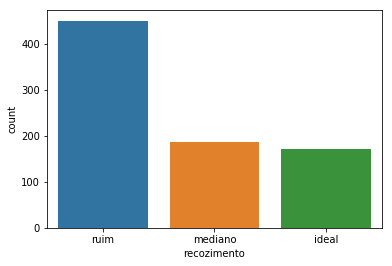

In [18]:
ax = sns.countplot(data = df_analise, x = 'recozimento', order = ('ruim', 'mediano', 'ideal'))

Para a analise do modelo não será necessário fazer balanceamento das classes.

### 01.1.2 - Family

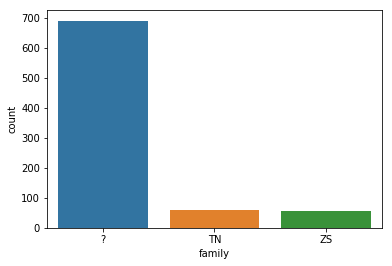

In [19]:
ax = sns.countplot(data = df_analise, x = 'family')

Há poucas observações da classes de familia, a coluna será descartada para a analise exploratória.

### 01.1.3 - Recozimento

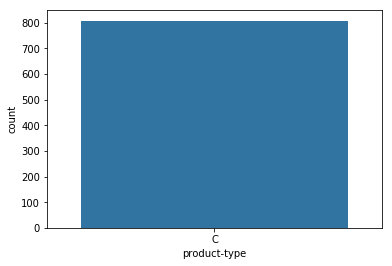

In [20]:
ax = sns.countplot(data = df_analise, x = 'product-type')

Existe apenas uma observação para este atributo, a coluna será descartada da analise.

In [21]:
df_analise = df_analise.drop(['product-type'], axis = 1)

### 01.1.4 - Steel

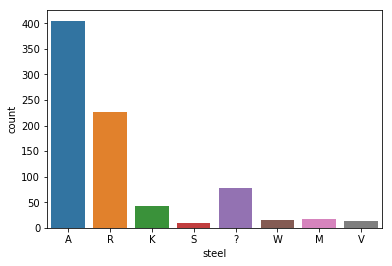

In [22]:
ax = sns.countplot(data = df_analise, x = 'steel')

<Figure size 1440x1152 with 0 Axes>

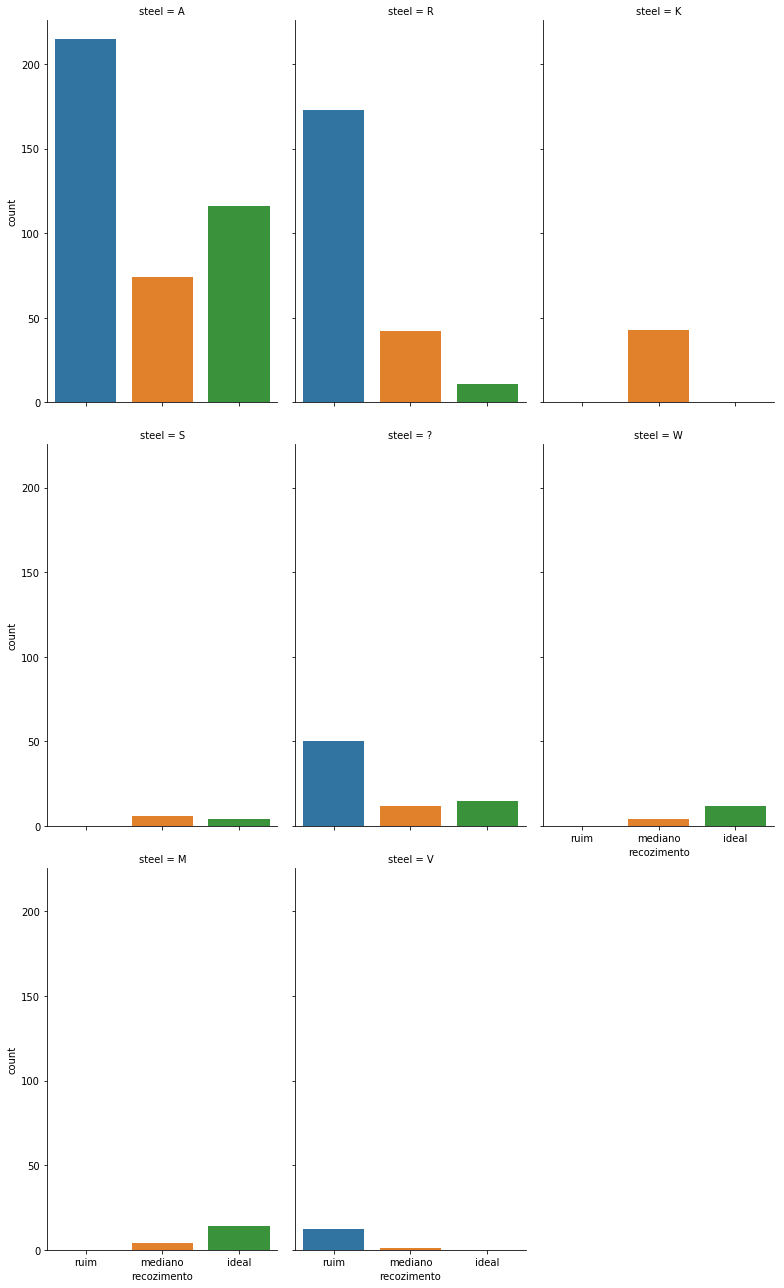

In [23]:
# Visualizando a qualidade do recozimento de acordo com o tipo de metal.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "recozimento",
            kind = "count", 
            col = 'steel', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

### 01.1.4 - temper_rolling

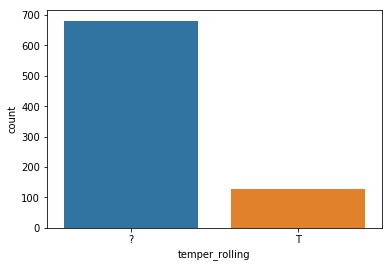

In [24]:
ax = sns.countplot(data = df_analise, x = 'temper_rolling')

<Figure size 1440x1152 with 0 Axes>

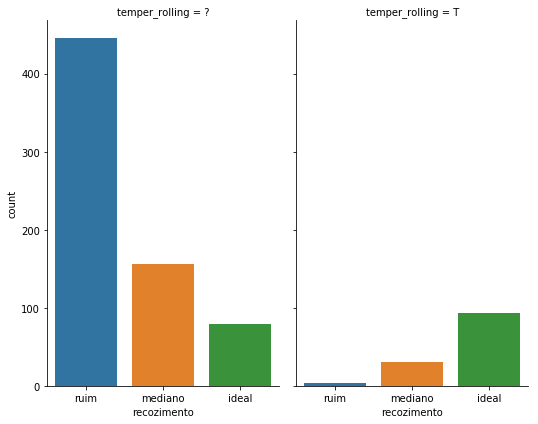

In [25]:
# Visualizando a qualidade do recozimento de acordo com o atributo temper_rolling.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "recozimento",
            kind = "count", 
            col = 'temper_rolling', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6); 

Apesar de poucas ocorrencias de experimentos com 'temper_rolling', vemos uma tendencia na melhora da qualidade do recozimento quando temos este atributo.

### 01.1.5 - condition

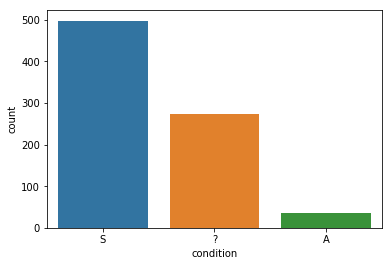

In [26]:
ax = sns.countplot(data = df_analise, x = 'condition')

<Figure size 1440x1152 with 0 Axes>

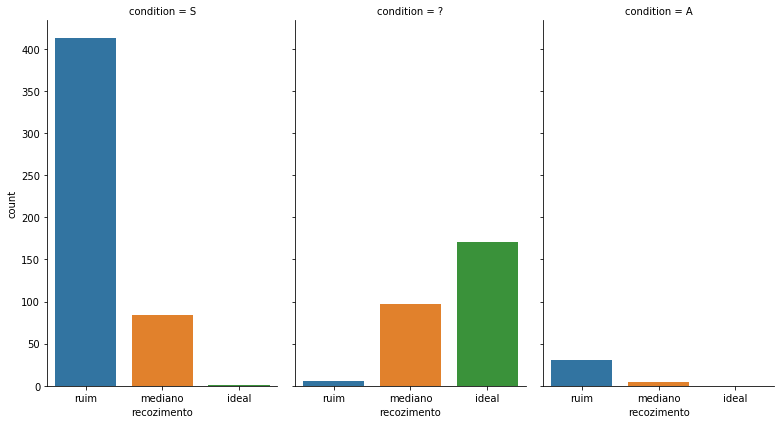

In [27]:
# Visualizando a qualidade do recozimento de acordo com o tipo de metal.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "recozimento",
            kind = "count", 
            col = 'condition', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

Apesar de poucas ocorrencias de experimentos com 'condition', vemos uma tendencia na melhora da qualidade do recozimento quando temos este atributo como 'condition = ?.

### 01.1.6 - formability

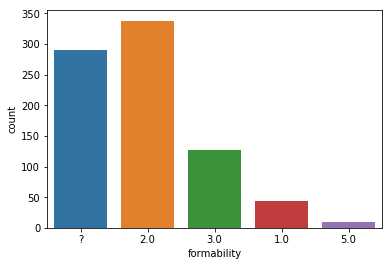

In [28]:
ax = sns.countplot(data = df_analise, x = 'formability')

<Figure size 1440x1152 with 0 Axes>

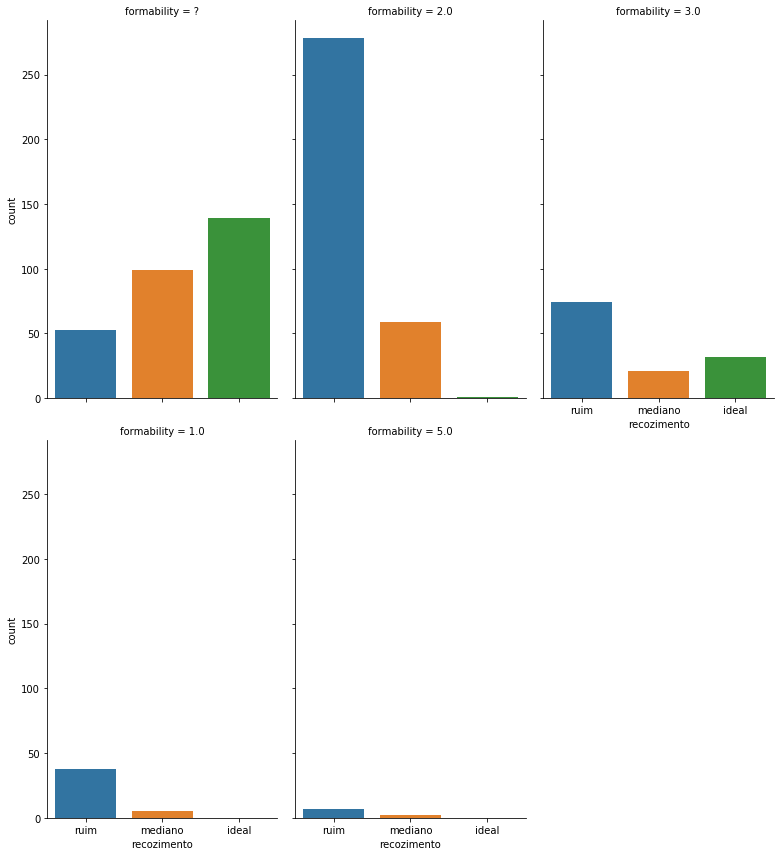

In [29]:
# Visualizando a qualidade do recozimento de acordo com o tipo de conformação.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "recozimento",
            kind = "count", 
            col = 'formability', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.7 - non-ageing

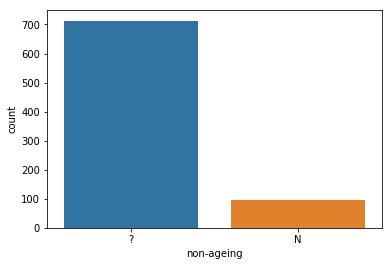

In [30]:
ax = sns.countplot(data = df_analise, x = 'non-ageing')

<Figure size 1440x1152 with 0 Axes>

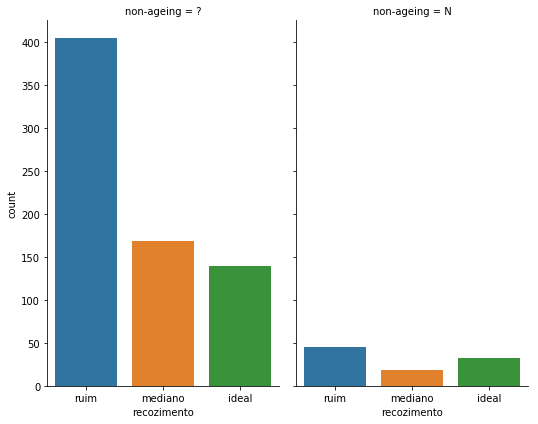

In [31]:
# Visualizando a qualidade do recozimento de acordo com o tipo de metal.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "recozimento",
            kind = "count", 
            col = 'non-ageing', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.8 - surface-finish

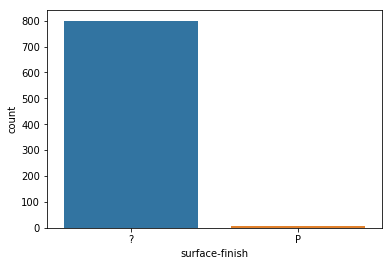

In [32]:
ax = sns.countplot(data = df_analise, x = 'surface-finish')

<Figure size 1440x1152 with 0 Axes>

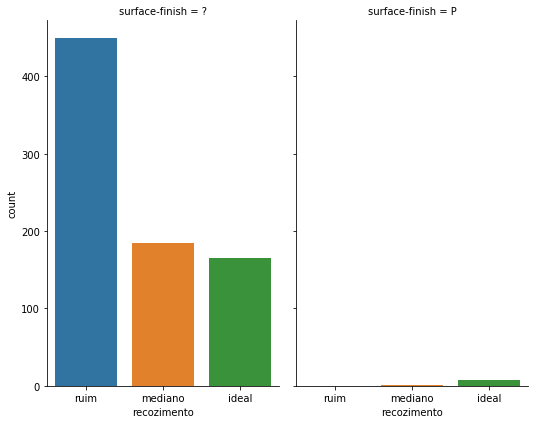

In [33]:
# Visualizando a qualidade do recozimento de acordo com o tipo de acabamento.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "recozimento",
            kind = "count", 
            col = 'surface-finish', col_wrap = 3,
            order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

Existem poucas ocorrencias para 'surface-finish = P', entretanto as observações existentes foram avaliadas como ideal ou mediano.
A feature será descartada.

In [34]:
df_analise = df_analise.drop(['surface-finish'], axis = 1)

### 01.1.9 - surface-quality

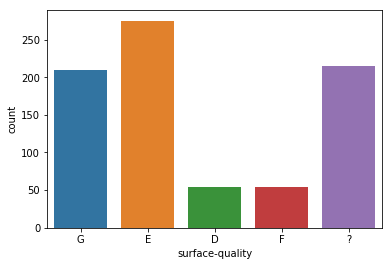

In [35]:
ax = sns.countplot(data = df_analise, x = 'surface-quality')

<Figure size 1440x1152 with 0 Axes>

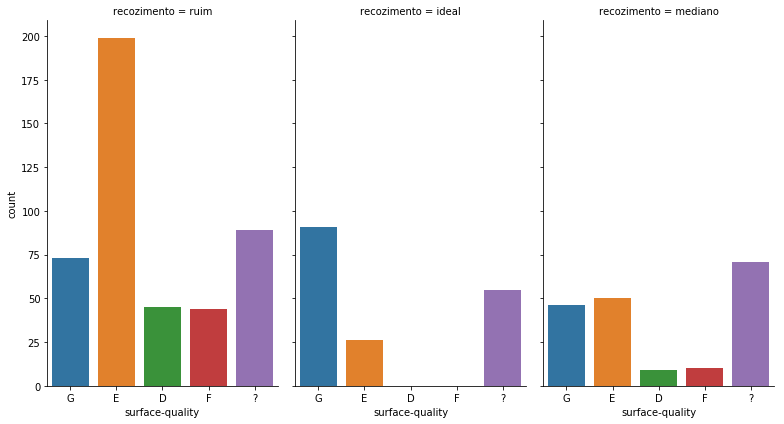

In [36]:
# Visualizando a qualidade do recozimento de acordo com o tipo de qualidade de superficie.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "surface-quality",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.10 - enamelability

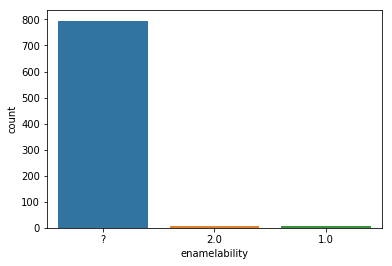

In [37]:
ax = sns.countplot(data = df_analise, x = 'enamelability')

<Figure size 1440x1152 with 0 Axes>

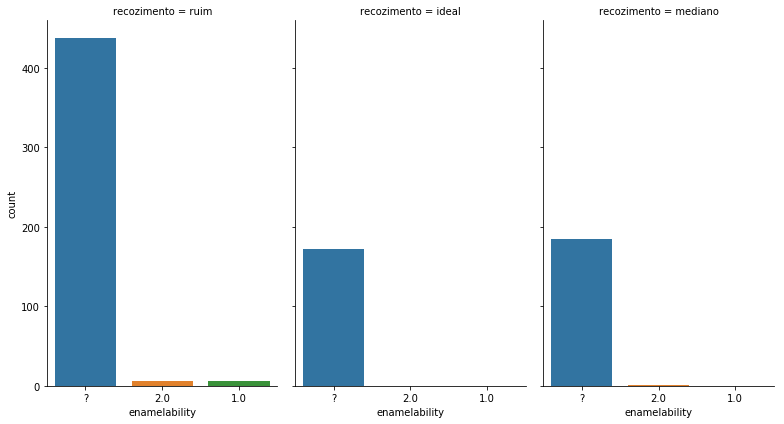

In [38]:
# Visualizando a qualidade do recozimento de acordo com o tipo de qualidade de superficie.
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "enamelability",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

Há poucas observações do atributo 'enamelability', a coluna será descartada na analise

In [39]:
df_analise = df_analise.drop(['enamelability'], axis = 1)

### 01.1.11 - bc

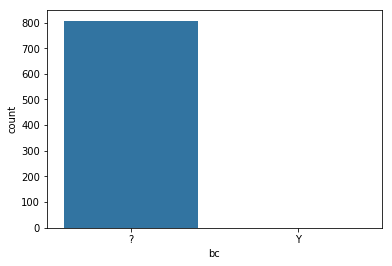

In [40]:
ax = sns.countplot(data = df_analise, x = 'bc')

Feature com observações unicas, sera descartada para analise.

In [41]:
df_analise = df_analise.drop(['bc'], axis = 1)

### 01.1.12 - bf

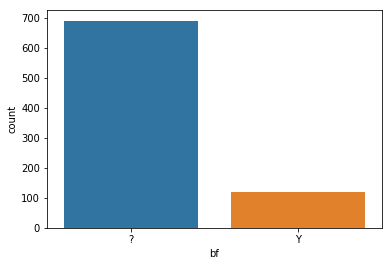

In [42]:
ax = sns.countplot(data = df_analise, x = 'bf')

<Figure size 1440x1152 with 0 Axes>

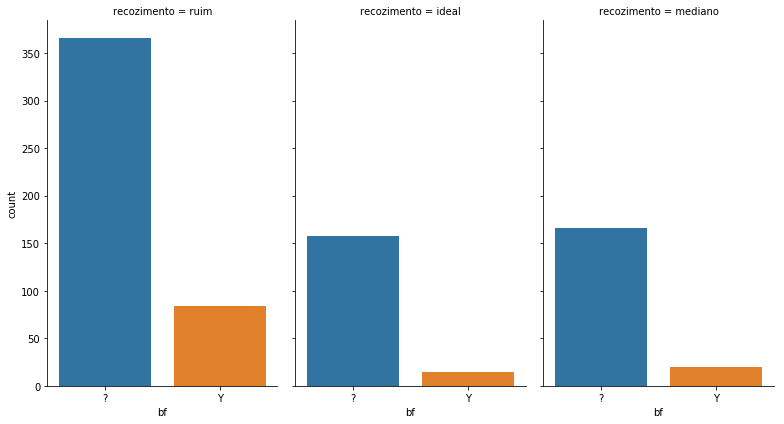

In [43]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bf'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "bf",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.13 - bw/me

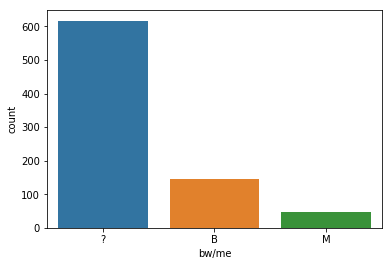

In [44]:
ax = sns.countplot(data = df_analise, x = 'bw/me')

<Figure size 1440x1152 with 0 Axes>

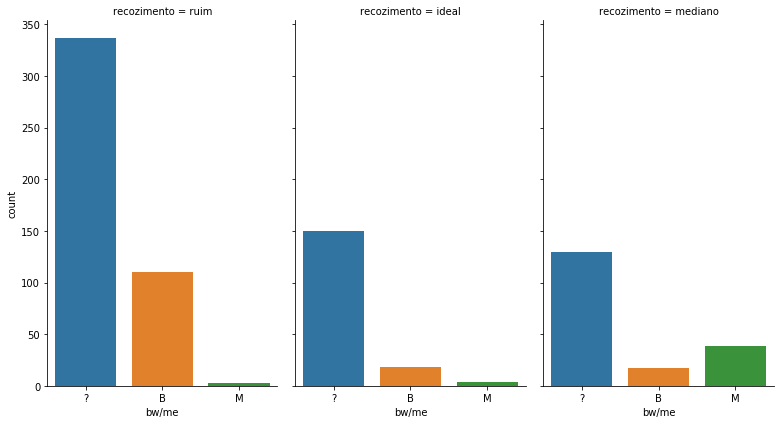

In [45]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bf'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "bw/me",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.14 - bl

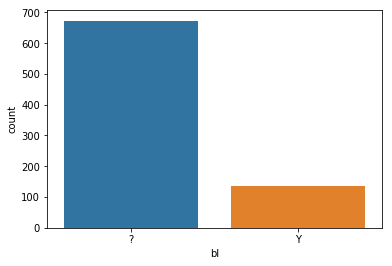

In [46]:
ax = sns.countplot(data = df_analise, x = 'bl')

<Figure size 1440x1152 with 0 Axes>

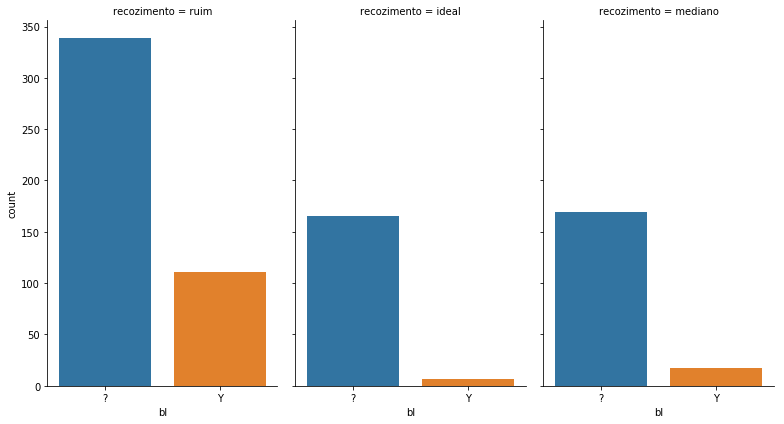

In [47]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bl'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "bl",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.15 - m

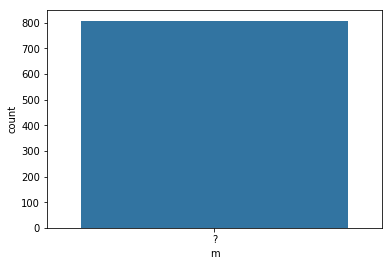

In [48]:
ax = sns.countplot(data = df_analise, x = 'm')

Feature com observações unicas, sera descartada para analise.

In [49]:
df_analise = df_analise.drop(['m'], axis = 1)

### 01.1.16 - chrom

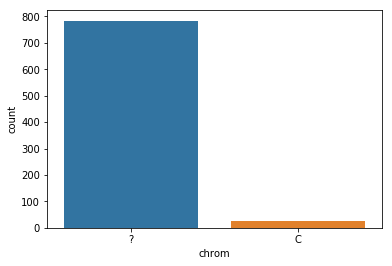

In [50]:
ax = sns.countplot(data = df_analise, x = 'chrom')

In [51]:
df_analise.groupby('chrom').size()

chrom
?    784
C     24
dtype: int64

<Figure size 1440x1152 with 0 Axes>

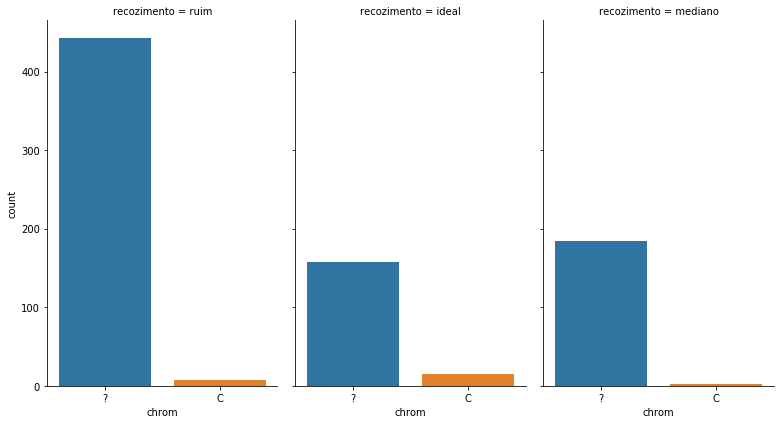

In [52]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bl'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "chrom",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

Há poucas observações do atributo 'chrom', a coluna será descartada na analise

In [53]:
df_analise = df_analise.drop(['chrom'], axis = 1)

### 01.1.17 - phos

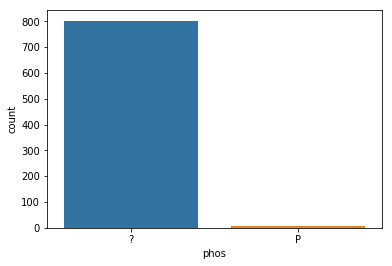

In [54]:
ax = sns.countplot(data = df_analise, x = 'phos')

Há poucas observações do atributo 'phos', a coluna será descartada na analise

In [55]:
df_analise = df_analise.drop(['phos'], axis = 1)

### 01.1.17 - cbond

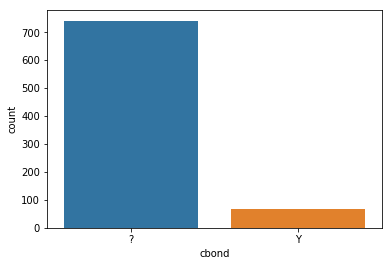

In [56]:
ax = sns.countplot(data = df_analise, x = 'cbond')

<Figure size 1440x1152 with 0 Axes>

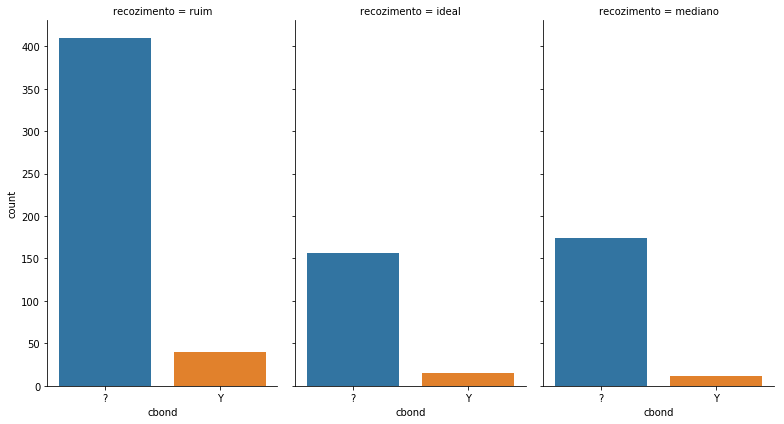

In [57]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bl'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "cbond",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

### 01.1.18 - marvi

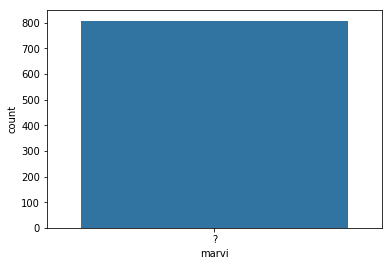

In [58]:
ax = sns.countplot(data = df_analise, x = 'marvi')

Feature com observações unicas, sera descartada para analise.

In [59]:
df_analise = df_analise.drop(['marvi'], axis = 1)

### 01.1.19 - exptl

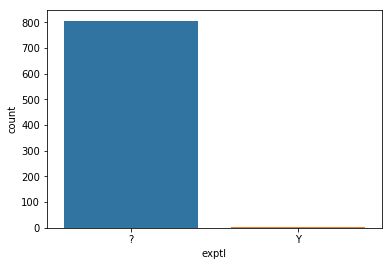

In [60]:
ax = sns.countplot(data = df_analise, x = 'exptl')

Feature com observações praticamente unicas, sera descartada para analise.

In [61]:
df_analise = df_analise.drop(['exptl'], axis = 1)

### 01.1.20 - ferro

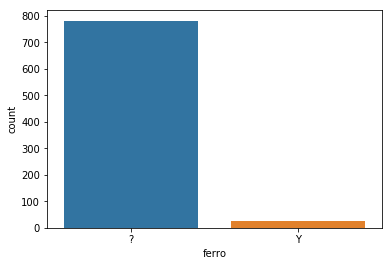

In [62]:
ax = sns.countplot(data = df_analise, x = 'ferro')

In [63]:
df_analise.groupby('ferro').size()

ferro
?    781
Y     27
dtype: int64

<Figure size 1440x1152 with 0 Axes>

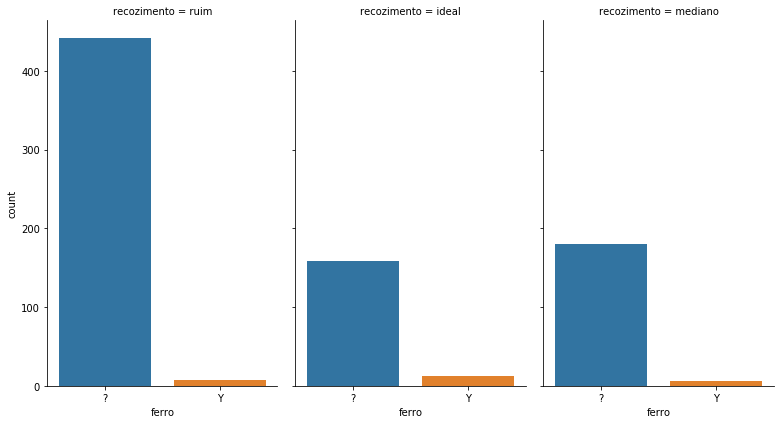

In [64]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bl'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "ferro",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

#### 01.1.21 - corr

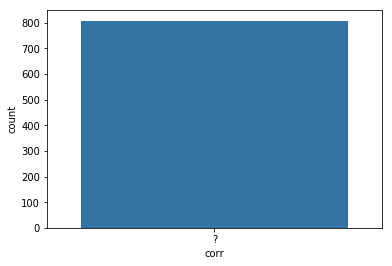

In [65]:
ax = sns.countplot(data = df_analise, x = 'corr')

Feature com observações unicas, sera descartada para analise.

In [66]:
df_analise = df_analise.drop(['corr'], axis = 1)

#### 01.1.22 - blue/bright/varn/clean

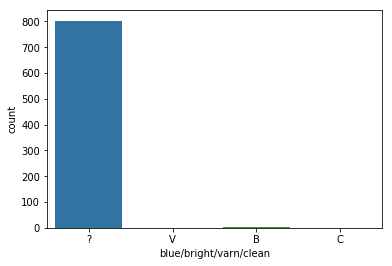

In [67]:
ax = sns.countplot(data = df_analise, x = 'blue/bright/varn/clean')

Há poucas observações do atributo 'blue/bright/varn/clean', a coluna será descartada na analise

#### 01.1.23 - lustre

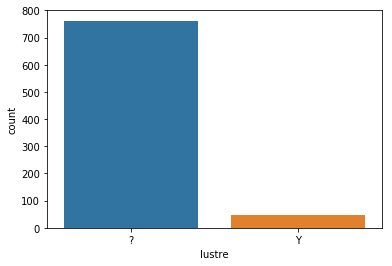

In [68]:
ax = sns.countplot(data = df_analise, x = 'lustre')

In [69]:
df_analise.groupby('lustre').size()

lustre
?    762
Y     46
dtype: int64

<Figure size 1440x1152 with 0 Axes>

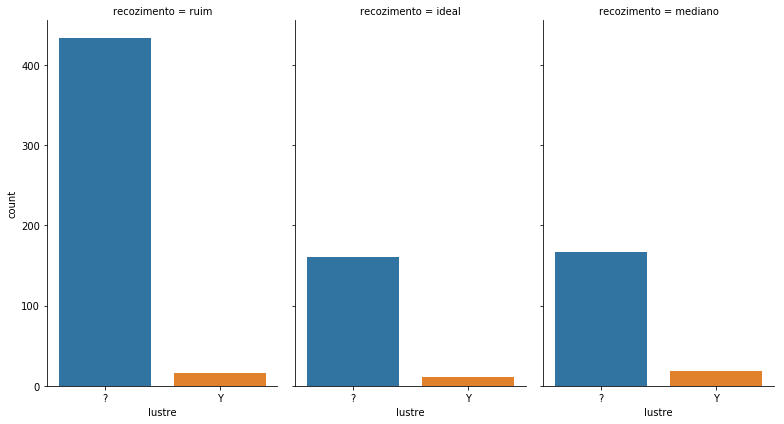

In [70]:
# Visualizando a qualidade do recozimento de acordo com a feature 'lustre'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "lustre",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);


Há poucas observações do atributo 'lusre', a coluna será descartada na analise

In [71]:
df_analise = df_analise.drop(['lustre'], axis = 1)

#### 01.1.24 - jurofm

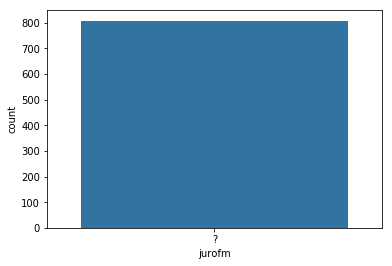

In [72]:
ax = sns.countplot(data = df_analise, x = 'jurofm')

Feature com observações unicas, sera descartada para analise.

In [73]:
df_analise = df_analise.drop(['jurofm'], axis = 1)

#### 01.1.25 - s

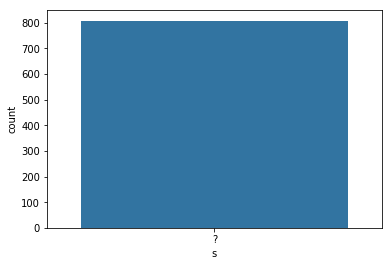

In [74]:
ax = sns.countplot(data = df_analise, x = 's')

Feature com observações unicas, sera descartada para analise.

In [75]:
df_analise = df_analise.drop(['s'], axis = 1)

#### 01.1.26 - p

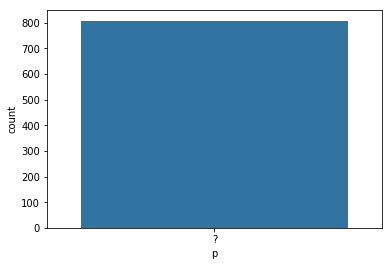

In [76]:
ax = sns.countplot(data = df_analise, x = 'p')

Feature com observações unicas, sera descartada para analise.

In [77]:
df_analise = df_analise.drop(['p'], axis = 1)

#### 01.1.27 - shape

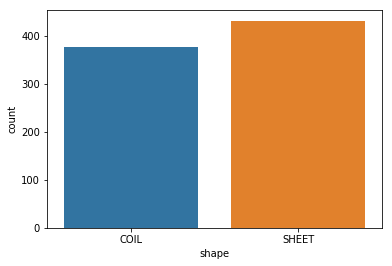

In [78]:
ax = sns.countplot(data = df_analise, x = 'shape')

<Figure size 1440x1152 with 0 Axes>

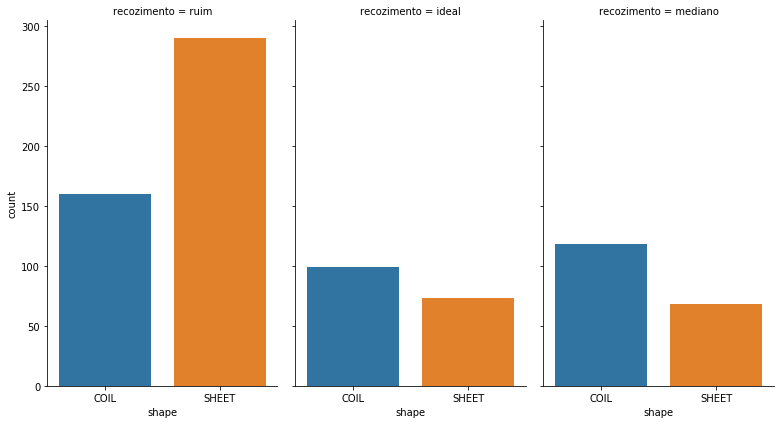

In [79]:
# Visualizando a qualidade do recozimento de acordo com a feature 'shape'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "shape",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

In [80]:
df_analise.groupby(['shape', 'recozimento']).size()

shape  recozimento
COIL   ideal           99
       mediano        118
       ruim           160
SHEET  ideal           73
       mediano         68
       ruim           290
dtype: int64

#### 01.1.28 - oil

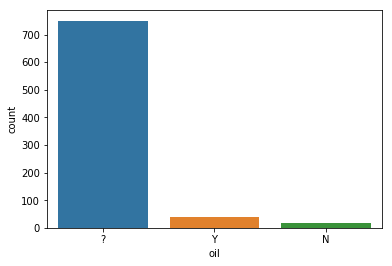

In [81]:
ax = sns.countplot(data = df_analise, x = 'oil')

<Figure size 1440x1152 with 0 Axes>

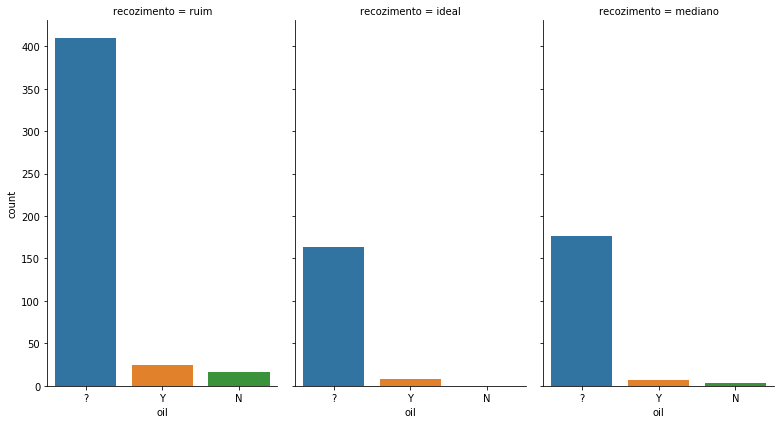

In [82]:
# Visualizando a qualidade do recozimento de acordo com a feature 'shape'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "oil",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

In [83]:
df_analise.groupby('oil').size()

oil
?    750
N     19
Y     39
dtype: int64

Há poucas observações do atributo 'oil', a coluna será descartada na analise

In [84]:
df_analise = df_analise.drop(['oil'], axis = 1)

#### 01.1.29 - bore

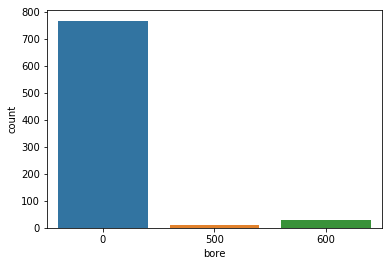

In [85]:
ax = sns.countplot(data = df_analise, x = 'bore')

In [86]:
df_analise.groupby('bore').size()

bore
0      768
500     10
600     30
dtype: int64

<Figure size 1440x1152 with 0 Axes>

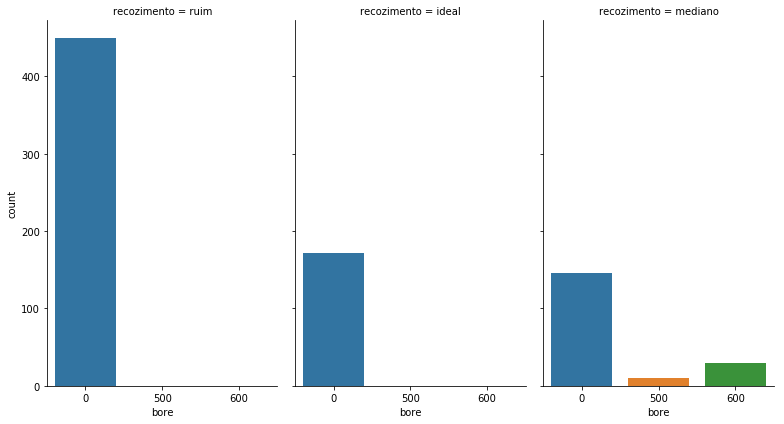

In [87]:
# Visualizando a qualidade do recozimento de acordo com a feature 'shape'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "bore",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

#### 01.1.30 - packing

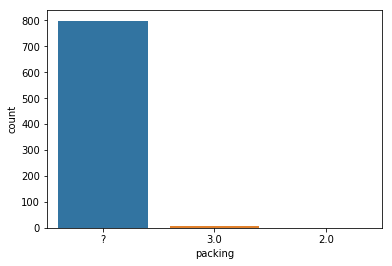

In [88]:
ax = sns.countplot(data = df_analise, x = 'packing')

Há poucas observações do atributo 'packing', a coluna será descartada na analise

<Figure size 1440x1152 with 0 Axes>

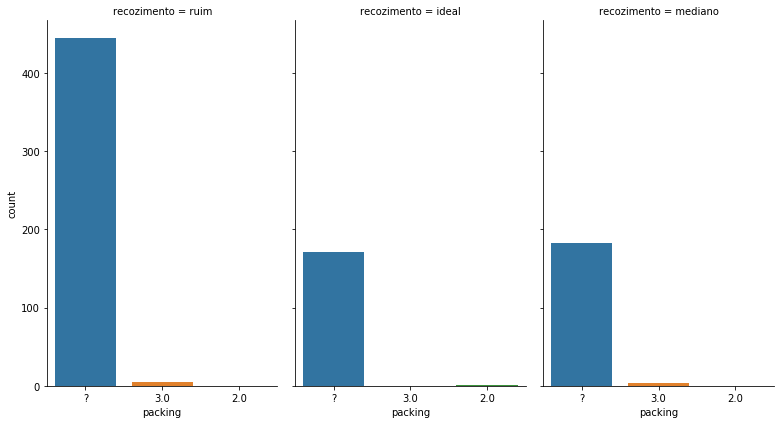

In [89]:
# Visualizando a qualidade do recozimento de acordo com a feature 'bl'
plt.figure(figsize=(20, 16))
g = sns.catplot(data = df_analise, x = "packing",
            kind = "count", 
            col = 'recozimento', col_wrap = 3,
            #order = ('ruim', 'mediano', 'ideal'),
            legend = True,
            margin_titles = True,
            legend_out = True ,
            height = 6, aspect = 0.6);

In [90]:
df_analise = df_analise.drop(['packing'], axis = 1)

In [91]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 807
Data columns (total 23 columns):
family                    808 non-null object
steel                     808 non-null object
carbon                    808 non-null int64
hardness                  808 non-null int64
temper_rolling            808 non-null object
condition                 808 non-null object
formability               808 non-null object
strength                  808 non-null int64
non-ageing                808 non-null object
surface-quality           808 non-null object
bf                        808 non-null object
bt                        808 non-null object
bw/me                     808 non-null object
bl                        808 non-null object
cbond                     808 non-null object
ferro                     808 non-null object
blue/bright/varn/clean    808 non-null object
shape                     808 non-null object
thick                     808 non-null object
width                   

O dataset sofre uma redução de dimensionalidade de 40 para 24 colunas, utilizando o criterio que para analise seriam utilizados os dados do mes de agosto de 2020. 

As colunas retiradas do dataset possuiam em sua maioria valores constante ou com baixissima variação.

## 01.2 - Analise dos Dados Quantitativos

#### 01.2.1 - carbon

In [92]:
df_analise['carbon'].head()

0    8
1    0
2    0
3    0
4    0
Name: carbon, dtype: int64

In [93]:
df_analise['carbon'].describe()

count    808.000000
mean       3.492574
std       13.542716
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000
Name: carbon, dtype: float64

#### 01.2.2 - hardness

In [94]:
df_analise['hardness'].head()

0     0
1     0
2    60
3    60
4    45
Name: hardness, dtype: int64

In [95]:
df_analise['hardness'].describe()

count    808.000000
mean      12.357673
std       25.134918
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       85.000000
Name: hardness, dtype: float64

#### 01.2.3 - strength

In [96]:
df_analise['strength'].head()

0    0
1    0
2    0
3    0
4    0
Name: strength, dtype: int64

In [97]:
df_analise['strength'].describe()

count    808.000000
mean      30.829208
std      116.203601
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      700.000000
Name: strength, dtype: float64

#### 01.2.4 - thick

In [98]:
df_analise['thick'].head()

0       _0.7_ 
1       _0.7_ 
2     _2.801_ 
3     _0.801_ 
4       _1.6_ 
Name: thick, dtype: object

Os dados foram armazenados como string e com sufixo e prefixo '_'

In [99]:
df_analise['thick'] = df_analise['thick'].str.replace('_', '').astype('float')

In [100]:
df_analise['thick'].describe()

count    808.000000
mean       1.194947
std        0.878501
min        0.240000
25%        0.601000
50%        0.800000
75%        1.600000
max        4.000000
Name: thick, dtype: float64

#### 01.2.4 - widht

In [101]:
df_analise['width'].head()

0      _610.0_ 
1     _1300.0_ 
2      _385.1_ 
3      _255.0_ 
4      _610.0_ 
Name: width, dtype: object

Os dados foram armazenados como string e com sufixo e prefixo '_'

In [102]:
df_analise['width'] = df_analise['width'].str.replace('_', '').astype('float')

In [103]:
df_analise['width'].describe()

count     808.000000
mean      781.849505
std       404.277628
min         0.000000
25%       609.900000
50%       610.000000
75%      1250.000000
max      1525.000000
Name: width, dtype: float64

#### 01.2.5 - len

In [104]:
df_analise['len'].head()

0       _0_ 
1     _762_ 
2       _0_ 
3     _269_ 
4       _0_ 
Name: len, dtype: object

Os dados foram armazenados como string e com sufixo e prefixo '_'

In [105]:
df_analise['len'] = df_analise['len'].str.replace('_', '').astype('float')

In [106]:
df_analise['len'].describe()

count     808.000000
mean     1232.308168
std      1854.913346
min         0.000000
25%         0.000000
50%       301.000000
75%       762.000000
max      4880.000000
Name: len, dtype: float64

## 02 - Analise do Dataset Limpo

In [107]:
df_analise.head()

,family,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-quality,...,bl,cbond,ferro,blue/bright/varn/clean,shape,thick,width,len,bore,recozimento
0,?,A,8,0,?,S,?,0,?,G,...,?,?,?,?,COIL,0.700,610.0,0.0,0,ruim
1,?,R,0,0,?,S,2.0,0,?,E,...,?,?,?,?,SHEET,0.700,1300.0,762.0,0,ruim
2,?,A,0,60,T,?,?,0,?,G,...,?,?,?,?,COIL,2.801,385.1,0.0,0,ideal
3,?,A,0,60,T,?,?,0,?,G,...,Y,Y,?,?,SHEET,0.801,255.0,269.0,0,ideal
4,?,A,0,45,?,S,?,0,?,D,...,?,?,?,?,COIL,1.600,610.0,0.0,0,mediano


In [108]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 807
Data columns (total 23 columns):
family                    808 non-null object
steel                     808 non-null object
carbon                    808 non-null int64
hardness                  808 non-null int64
temper_rolling            808 non-null object
condition                 808 non-null object
formability               808 non-null object
strength                  808 non-null int64
non-ageing                808 non-null object
surface-quality           808 non-null object
bf                        808 non-null object
bt                        808 non-null object
bw/me                     808 non-null object
bl                        808 non-null object
cbond                     808 non-null object
ferro                     808 non-null object
blue/bright/varn/clean    808 non-null object
shape                     808 non-null object
thick                     808 non-null float64
width                  

In [109]:
df_analise.describe()

,carbon,hardness,strength,thick,width,len,bore
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,3.492574,12.357673,30.829208,1.194947,781.849505,1232.308168,28.465347
std,13.542716,25.134918,116.203601,0.878501,404.277628,1854.913346,125.177926
min,0.000000,0.000000,0.000000,0.240000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.800000,610.000000,301.000000,0.000000
75%,0.000000,0.000000,0.000000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.000000,4.000000,1525.000000,4880.000000,600.000000


In [110]:
df_analise.corr()

,carbon,hardness,strength,thick,width,len,bore
carbon,1.000000,-0.126951,-0.068505,0.193119,0.002418,-0.127345,0.285930
hardness,-0.126951,1.000000,-0.130599,0.023384,-0.032118,-0.117843,0.169656
strength,-0.068505,-0.130599,1.000000,0.075101,0.055514,-0.031351,-0.033996
thick,0.193119,0.023384,0.075101,1.000000,0.015904,-0.083123,0.394505
width,0.002418,-0.032118,0.055514,0.015904,1.000000,0.107076,0.023235
len,-0.127345,-0.117843,-0.031351,-0.083123,0.107076,1.000000,-0.151259
bore,0.285930,0.169656,-0.033996,0.394505,0.023235,-0.151259,1.000000


## 03 - Salvando Dataset Limpo Para Analise

In [114]:
df_analise.to_csv('dataset_clean.csv')